In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis, skew

%matplotlib inline
pd.set_option('display.max_columns', None)

In [39]:
df1 = pd.read_csv('online_shoppers_intentions_clean')

In [40]:
df1.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day,Month,Operating_systems,Browser,Region,Traffic_type,Visitor_type,Weekend,Revenue,Browser_label,Os_label,Region_label,Traffic_type_label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning Visitor,False,False,Chrome,Windows,Norteamérica,Organic Traffic
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning Visitor,False,False,Safari,MacOS,Norteamérica,Direct Traffic
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning Visitor,False,False,Chrome,Android,Other,Referral Traffic
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning Visitor,False,False,Safari,Linux,Europa,Paid Traffic
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning Visitor,True,False,Internet Explorer,Linux,Norteamérica,Paid Traffic


In [41]:
coded_columns = ['Browser', 'Region', 'Traffic_type', 'Operating_systems']

In [42]:
df_univariate = df1.drop(columns=coded_columns)

In [43]:
df_univariate.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day,Month,Visitor_type,Weekend,Revenue,Browser_label,Os_label,Region_label,Traffic_type_label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning Visitor,False,False,Chrome,Windows,Norteamérica,Organic Traffic
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,Returning Visitor,False,False,Safari,MacOS,Norteamérica,Direct Traffic
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning Visitor,False,False,Chrome,Android,Other,Referral Traffic
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Returning Visitor,False,False,Safari,Linux,Europa,Paid Traffic
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Returning Visitor,True,False,Internet Explorer,Linux,Norteamérica,Paid Traffic


In [44]:
df_univariate.shape

(12205, 18)

In [45]:
categorical_columns = [
    'Month',
    'Visitor_type',
    'Weekend',
    'Revenue',
    'Browser_label',
    'Os_label',
    'Region_label',
    'Traffic_type_label'
]

In [46]:
cat = df_univariate[categorical_columns]

In [47]:
cat.head()

,Month,Visitor_type,Weekend,Revenue,Browser_label,Os_label,Region_label,Traffic_type_label
0,Feb,Returning Visitor,False,False,Chrome,Windows,Norteamérica,Organic Traffic
1,Feb,Returning Visitor,False,False,Safari,MacOS,Norteamérica,Direct Traffic
2,Feb,Returning Visitor,False,False,Chrome,Android,Other,Referral Traffic
3,Feb,Returning Visitor,False,False,Safari,Linux,Europa,Paid Traffic
4,Feb,Returning Visitor,True,False,Internet Explorer,Linux,Norteamérica,Paid Traffic


In [48]:
numerical_columns = [col for col in df_univariate.columns if col not in categorical_columns]

In [49]:
num = df_univariate[numerical_columns]


In [50]:
num.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


<h1 style="color: #00BFFF;">Univariate Analysis</h1>

<h2 style="color: #008080;">Categorical Variables</h2>

Frecuency Tables

Lo haremos primero del Target. 

In [51]:
frequency_table_target = cat.Revenue.value_counts()
frequency_table_target

Revenue
False    10297
True      1908
Name: count, dtype: int64

Ahora con las demás...

In [52]:
frequency_table_month= cat.Month.value_counts()
frequency_table_month

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

In [53]:
frequency_table_vt = cat.Visitor_type.value_counts()
frequency_table_vt

Visitor_type
Returning Visitor    10431
New Visitor           1693
Other                   81
Name: count, dtype: int64

In [54]:
frequency_table_wknd = cat.Weekend.value_counts()
frequency_table_wknd

Weekend
False    9346
True     2859
Name: count, dtype: int64

In [ ]:
frequency_table_bl = cat.Browser_label.value_counts()
frequency_table_bl

Browser_label
Safari               7883
Chrome               2427
Firefox               731
Edge                  465
Otros                 420
Opera                 174
Internet Explorer     105
Name: count, dtype: int64

In [57]:
frequency_table_os = cat.Os_label.value_counts()
frequency_table_os

Os_label
MacOS      6541
Windows    2549
Linux      2530
Android     478
Other       101
iOS           6
Name: count, dtype: int64

In [58]:
frequency_table_region = cat.Region_label.value_counts()
frequency_table_region

Region_label
Norteamérica     4714
Asia             2379
Sudamérica       1171
Europa           1128
Oceanía           801
Oriente Medio     758
Other             505
Antártida         431
África            318
Name: count, dtype: int64

In [61]:
frequency_table_tt = cat.Traffic_type_label.value_counts()
frequency_table_tt

Traffic_type_label
Direct Traffic      3911
Organic Traffic     2388
Other               2124
Referral Traffic    2013
Paid Traffic        1066
Email Marketing      443
Social Media         260
Name: count, dtype: int64

Proportion Tables 

Primero con Target y luego con el resto de las categóricas.

In [ ]:
proportion_table_target = cat.Revenue.value_counts(normalize=True).round(2) 
proportion_table_target

Revenue
False    0.84
True     0.16
Name: proportion, dtype: float64

In [79]:
proportion_table_month = cat.Month.value_counts(normalize=True).round(2) 
proportion_table_month

Month
May     0.27
Nov     0.24
Mar     0.15
Dec     0.14
Oct     0.04
Sep     0.04
Aug     0.04
Jul     0.04
June    0.02
Feb     0.01
Name: proportion, dtype: float64

In [ ]:
proportion_table_vt = cat.Visitor_type.value_counts(normalize=True).round(2) 
proportion_table_vt

Visitor_type
Returning Visitor    0.85
New Visitor          0.14
Other                0.01
Name: proportion, dtype: float64

In [ ]:
proportion_table_wknd = cat.Weekend.value_counts(normalize=True).round(2)
proportion_table_wknd

Weekend
False    0.77
True     0.23
Name: proportion, dtype: float64

In [66]:
proportion_table_bl = cat.Browser_label.value_counts(normalize=True).round(2) ###Lo de en porcentajes
proportion_table_bl

Browser_label
Safari               0.65
Chrome               0.20
Firefox              0.06
Edge                 0.04
Otros                0.03
Opera                0.01
Internet Explorer    0.01
Name: proportion, dtype: float64

In [67]:
proportion_table_os = cat.Os_label.value_counts(normalize=True).round(2) ###Lo de en porcentajes
proportion_table_os

Os_label
MacOS      0.54
Windows    0.21
Linux      0.21
Android    0.04
Other      0.01
iOS        0.00
Name: proportion, dtype: float64

In [69]:
proportion_table_region = cat.Region_label.value_counts(normalize=True).round(2) ###Lo de en porcentajes
proportion_table_region

Region_label
Norteamérica     0.39
Asia             0.19
Sudamérica       0.10
Europa           0.09
Oceanía          0.07
Oriente Medio    0.06
Other            0.04
Antártida        0.04
África           0.03
Name: proportion, dtype: float64

In [70]:
proportion_table_tt= cat.Traffic_type_label.value_counts(normalize=True).round(2) ###Lo de en porcentajes
proportion_table_tt

Traffic_type_label
Direct Traffic      0.32
Organic Traffic     0.20
Other               0.17
Referral Traffic    0.16
Paid Traffic        0.09
Email Marketing     0.04
Social Media        0.02
Name: proportion, dtype: float64

In [71]:
freqs_target = pd.concat([frequency_table_target, proportion_table_target], axis=1)
freqs_target

,count,proportion
Revenue,,
False,10297,0.84
True,1908,0.16


In [74]:
freqs_target.columns = ['absolute_frequency', 'relative_frequency']
freqs_target

,absolute_frequency,relative_frequency
Revenue,,
False,10297,0.84
True,1908,0.16


In [81]:
freqs_month = pd.concat([frequency_table_month, proportion_table_month], axis=1)
freqs_month

,count,proportion
Month,,
May,3329,0.27
Nov,2982,0.24
Mar,1860,0.15
Dec,1706,0.14
Oct,549,0.04
Sep,448,0.04
Aug,433,0.04
Jul,432,0.04
June,285,0.02


In [89]:
freqs_month.columns = ['absolute_frequency', 'relative_frequency']
freqs_month

,absolute_frequency,relative_frequency
Month,,
May,3329,0.27
Nov,2982,0.24
Mar,1860,0.15
Dec,1706,0.14
Oct,549,0.04
Sep,448,0.04
Aug,433,0.04
Jul,432,0.04
June,285,0.02


In [82]:
freqs_vt = pd.concat([frequency_table_vt, proportion_table_vt], axis=1)
freqs_vt

,count,proportion
Visitor_type,,
Returning Visitor,10431,0.85
New Visitor,1693,0.14
Other,81,0.01


In [90]:
freqs_vt.columns = ['absolute_frequency', 'relative_frequency']
freqs_vt

,absolute_frequency,relative_frequency
Visitor_type,,
Returning Visitor,10431,0.85
New Visitor,1693,0.14
Other,81,0.01


In [83]:
freqs_weekend = pd.concat([frequency_table_wknd, proportion_table_wknd], axis=1)
freqs_weekend

,count,proportion
Weekend,,
False,9346,0.77
True,2859,0.23


In [91]:
freqs_weekend.columns = ['absolute_frequency', 'relative_frequency']
freqs_weekend

,absolute_frequency,relative_frequency
Weekend,,
False,9346,0.77
True,2859,0.23


In [84]:
freqs_bl = pd.concat([frequency_table_bl, proportion_table_bl], axis=1)
freqs_bl

,count,proportion
Browser_label,,
Safari,7883,0.65
Chrome,2427,0.20
Firefox,731,0.06
Edge,465,0.04
Otros,420,0.03
Opera,174,0.01
Internet Explorer,105,0.01


In [92]:
freqs_bl.columns = ['absolute_frequency', 'relative_frequency']
freqs_bl

,absolute_frequency,relative_frequency
Browser_label,,
Safari,7883,0.65
Chrome,2427,0.20
Firefox,731,0.06
Edge,465,0.04
Otros,420,0.03
Opera,174,0.01
Internet Explorer,105,0.01


In [85]:
freqs_os = pd.concat([frequency_table_os, proportion_table_os], axis=1)
freqs_os

,count,proportion
Os_label,,
MacOS,6541,0.54
Windows,2549,0.21
Linux,2530,0.21
Android,478,0.04
Other,101,0.01
iOS,6,0.00


In [93]:
freqs_os.columns = ['absolute_frequency', 'relative_frequency']
freqs_os

,absolute_frequency,relative_frequency
Os_label,,
MacOS,6541,0.54
Windows,2549,0.21
Linux,2530,0.21
Android,478,0.04
Other,101,0.01
iOS,6,0.00


In [86]:
freqs_region = pd.concat([frequency_table_region, proportion_table_region], axis=1)
freqs_region

,count,proportion
Region_label,,
Norteamérica,4714,0.39
Asia,2379,0.19
Sudamérica,1171,0.10
Europa,1128,0.09
Oceanía,801,0.07
Oriente Medio,758,0.06
Other,505,0.04
Antártida,431,0.04
África,318,0.03


In [94]:
freqs_region.columns = ['absolute_frequency', 'relative_frequency']
freqs_region

,absolute_frequency,relative_frequency
Region_label,,
Norteamérica,4714,0.39
Asia,2379,0.19
Sudamérica,1171,0.10
Europa,1128,0.09
Oceanía,801,0.07
Oriente Medio,758,0.06
Other,505,0.04
Antártida,431,0.04
África,318,0.03


In [87]:
freqs_tt = pd.concat([frequency_table_tt, proportion_table_tt], axis=1)
freqs_tt

,count,proportion
Traffic_type_label,,
Direct Traffic,3911,0.32
Organic Traffic,2388,0.20
Other,2124,0.17
Referral Traffic,2013,0.16
Paid Traffic,1066,0.09
Email Marketing,443,0.04
Social Media,260,0.02


In [95]:
freqs_tt.columns = ['absolute_frequency', 'relative_frequency']
freqs_tt

,absolute_frequency,relative_frequency
Traffic_type_label,,
Direct Traffic,3911,0.32
Organic Traffic,2388,0.20
Other,2124,0.17
Referral Traffic,2013,0.16
Paid Traffic,1066,0.09
Email Marketing,443,0.04
Social Media,260,0.02


<h1 style="color: #00BFFF;">Visualizations</h1>

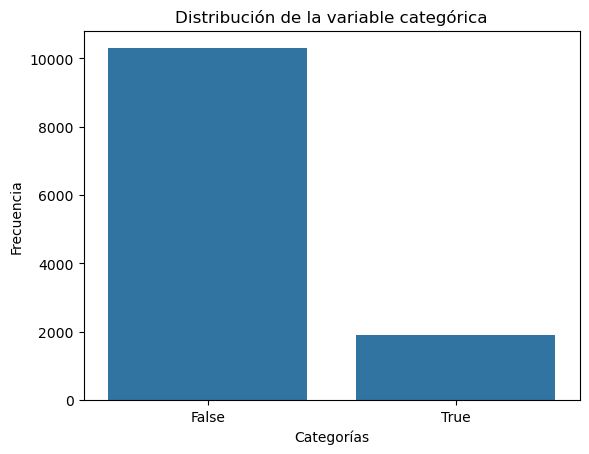

In [101]:
sns.countplot(x='Revenue', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

Diferencia en las categorías:

Existe una notable diferencia en las frecuencias entre las categorías. Es probable que haya muchas más sesiones sin conversión (valor False) que con conversión (valor True).
Clase desbalanceada:

Este comportamiento es típico en problemas de predicción de conversiones. La clase de conversión (True) representa un porcentaje mucho menor del total, lo que puede requerir técnicas como el ajuste de pesos en modelos predictivos o el sobremuestreo/submuestreo.
Acción recomendada:

Este desbalance debe ser considerado en cualquier análisis posterior, especialmente en el modelado, para evitar sesgos hacia la clase mayoritaria.

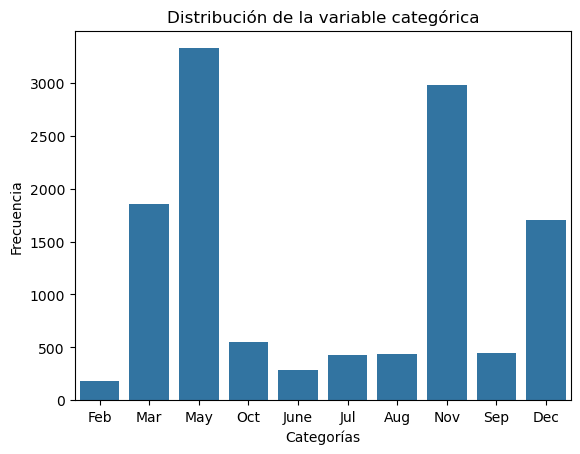

In [ ]:
sns.countplot(x='Month', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Month", que indica en qué mes se registraron las sesiones. Aquí están los insights:

Meses más frecuentes:

Hay meses con una frecuencia significativamente mayor, como Nov (noviembre), lo que sugiere un aumento en las sesiones durante temporadas específicas, probablemente debido a eventos como promociones, Black Friday o el inicio de las compras navideñas.
Meses menos frecuentes:

Algunos meses, como Feb (febrero) o Sep (septiembre), tienen una menor cantidad de sesiones, lo que puede reflejar temporadas bajas en actividad de compras.
Estacionalidad:

Esto indica la posible presencia de estacionalidad en el comportamiento de los usuarios, lo cual es clave para planificar estrategias comerciales.
Acción recomendada:

Si el objetivo es predecir conversiones o analizar el comportamiento del usuario, incluir esta variable en el análisis puede ser relevante debido a la variación en los patrones de uso entre meses.

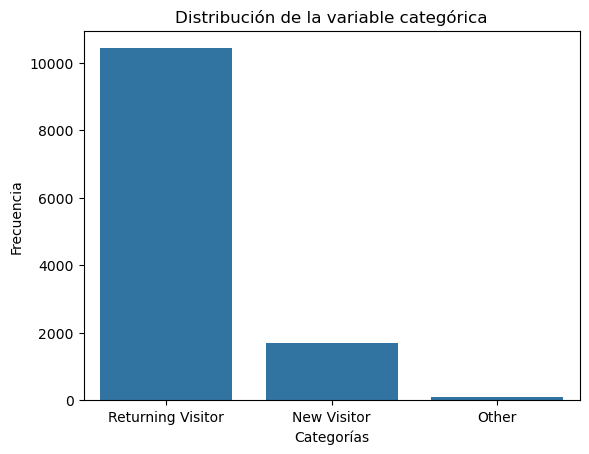

In [103]:
sns.countplot(x='Visitor_type', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Visitor_type", que clasifica a los visitantes en diferentes tipos según su comportamiento. Aquí están los insights:

Tipo de visitante predominante:

La categoría "Returning Visitor" tiene una frecuencia mucho mayor que las demás, lo que indica que la mayoría de las sesiones corresponden a usuarios que ya han visitado el sitio anteriormente.
Visitantes nuevos:

La categoría "New Visitor" tiene una frecuencia notablemente menor, lo que sugiere que el sitio recibe menos tráfico de usuarios nuevos en comparación con los que regresan.
Otros visitantes:

La categoría "Other" tiene una frecuencia muy baja, posiblemente agrupando casos atípicos o visitantes que no encajan claramente en las otras dos categorías.
Acción recomendada:

Este tipo de análisis es clave para entender la fidelización del cliente. El predominio de los visitantes recurrentes podría ser un punto positivo para estrategias de retención, pero también destaca la necesidad de analizar cómo atraer a más visitantes nuevos.

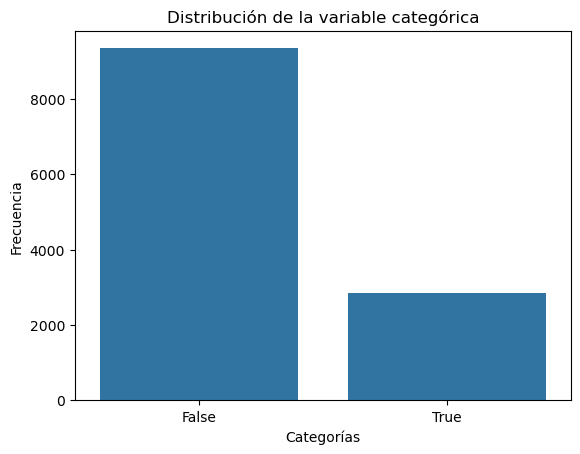

In [104]:
sns.countplot(x='Weekend', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Weekend", que indica si una sesión ocurrió durante un fin de semana. Aquí están los insights:

Frecuencia predominante:

La mayoría de las sesiones no ocurrieron durante un fin de semana (False). Esto sugiere que el tráfico en el sitio es mayor en días laborales.
Sesiones en fines de semana:

Aunque la categoría True (fin de semana) tiene una frecuencia menor, sigue siendo un segmento importante que podría reflejar el comportamiento de usuarios que navegan en su tiempo libre.
Implicaciones comerciales:

Esto puede ser relevante para campañas publicitarias y promociones. Las estrategias dirigidas a días laborales podrían tener un mayor impacto en el tráfico y conversiones.
Acción recomendada:

Profundizar en cómo varía el comportamiento de los usuarios entre días laborales y fines de semana, especialmente en términos de conversión y duración de las sesiones.
Si deseas analizar esta variable en combinación con otras, como el tipo de visitante o el mes, podemos explorar más relaciones. 😊 ​

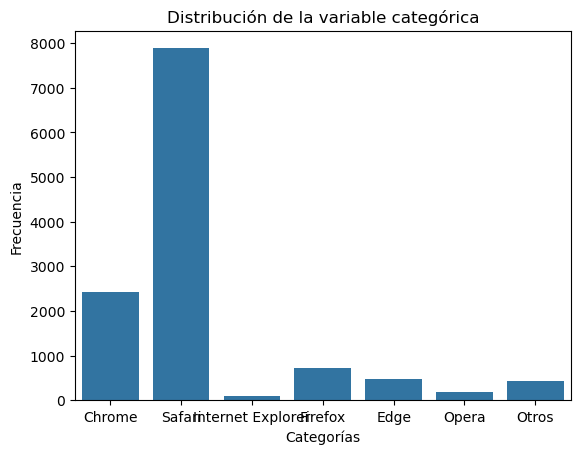

In [105]:
sns.countplot(x='Browser_label', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Browser_label", que identifica los navegadores usados por los visitantes del sitio. Aquí están los insights:

Navegador más utilizado:

Un navegador en particular (como Chrome) tiene una frecuencia mucho mayor en comparación con otros. Esto indica que una gran proporción de usuarios acceden al sitio utilizando este navegador.
Diversidad de navegadores:

Aunque hay navegadores dominantes, la gráfica muestra una variedad significativa de opciones utilizadas por los usuarios, como Safari, Firefox, etc.
Navegadores menos utilizados:

Algunos navegadores tienen una frecuencia muy baja, lo que podría reflejar un grupo pequeño de usuarios o navegadores menos comunes.
Acción recomendada:

Este análisis es útil para garantizar que el sitio esté optimizado para los navegadores más utilizados, minimizando problemas de compatibilidad que puedan afectar a un segmento grande de usuarios.

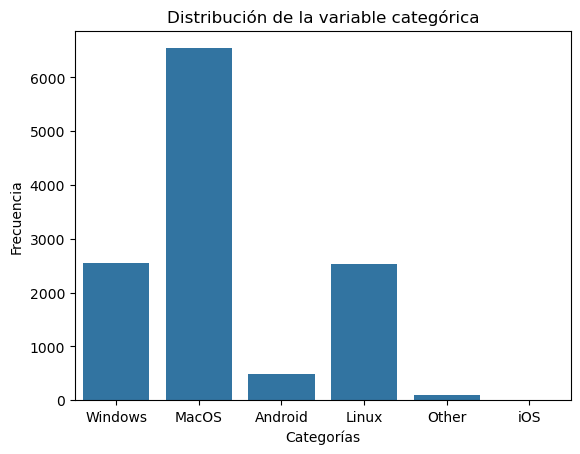

In [106]:
sns.countplot(x='Os_label', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Os_label", que identifica los sistemas operativos usados por los visitantes. Aquí están los insights:

Sistema operativo más utilizado:

Un sistema operativo específico (como Windows) domina claramente la distribución. Esto sugiere que la mayoría de los usuarios acceden al sitio desde dispositivos con este sistema.
Diversidad de sistemas operativos:

Aunque hay un sistema operativo predominante, otros, como MacOS y Android, también tienen una participación significativa, indicando una audiencia diversa en términos de dispositivos.
Sistemas menos comunes:

Algunos sistemas operativos, como Linux, tienen una frecuencia menor, pero pueden representar nichos específicos de usuarios.
Optimización:

Es importante asegurarse de que el sitio sea compatible y esté optimizado para los sistemas operativos más utilizados, con especial atención a la experiencia de usuario en sistemas con menor participación.

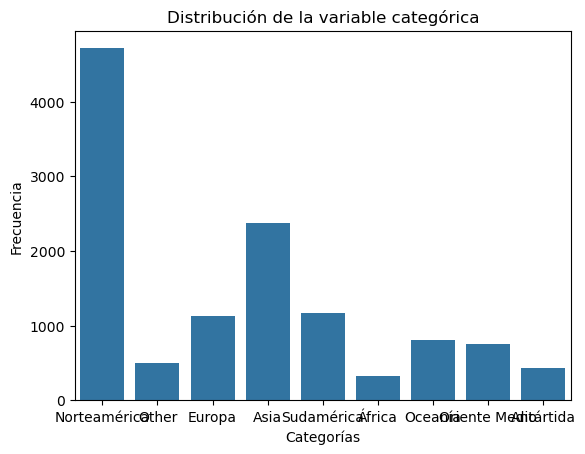

In [107]:
sns.countplot(x='Region_label', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable categórica "Region_label", que representa las regiones desde las cuales los usuarios acceden al sitio. Aquí están los insights:

Región predominante:

Una región específica (como Norteamérica) tiene la mayor frecuencia, indicando que una gran proporción de los usuarios del sitio provienen de esa área geográfica.
Diversidad geográfica:

Aunque hay una región dominante, también hay participación de otras regiones, como Europa o Asia, lo que indica una audiencia global.
Regiones menos representadas:

Algunas regiones tienen una frecuencia baja, lo que podría ser un reflejo de una menor penetración del mercado o una falta de enfoque en esas áreas.
Acción recomendada:

Es importante analizar si las estrategias de marketing o contenido están alineadas con las regiones predominantes y evaluar oportunidades para crecer en regiones con menor representación.
Exploración adicional:

Analizar cómo varía el comportamiento del usuario (como la conversión) por región podría proporcionar insights sobre diferencias culturales o de mercado.

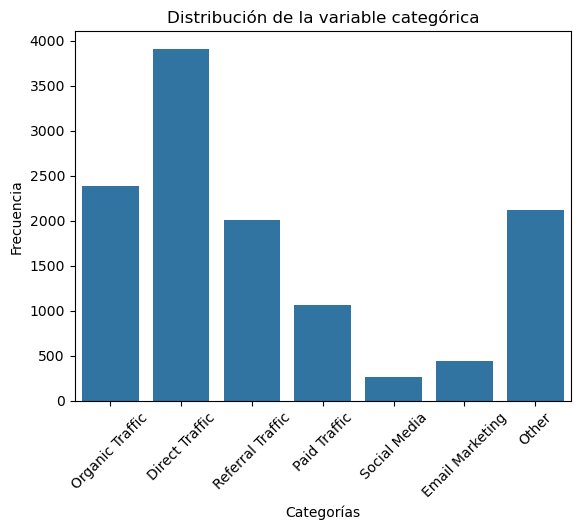

In [110]:
sns.countplot(x='Traffic_type_label', data=cat)
plt.title('Distribución de la variable categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)  # Cambia el ángulo según necesites (45, 90, etc.)
plt.show()

Tráfico predominante:

Un tipo de tráfico, como "Direct Traffic" o "Organic Traffic", parece ser la fuente principal de visitas. Esto podría indicar que los usuarios llegan al sitio principalmente a través de búsquedas orgánicas o acceso directo.
Fuentes de tráfico menos comunes:

Algunos tipos de tráfico, como "Referral Traffic" o "Paid Traffic", tienen frecuencias significativamente más bajas, lo que podría sugerir menos enfoque o inversión en esas fuentes.
Implicaciones estratégicas:

La dependencia de un tipo de tráfico en particular podría ser una oportunidad o un riesgo. Por ejemplo, depender demasiado de tráfico orgánico podría ser problemático si cambian las reglas del motor de búsqueda.
Acción recomendada:

Es importante diversificar las fuentes de tráfico para reducir riesgos. Analizar la efectividad de las campañas pagadas o las estrategias de referidos podría ser un buen paso para equilibrar estas categorías.


##### Pie charts

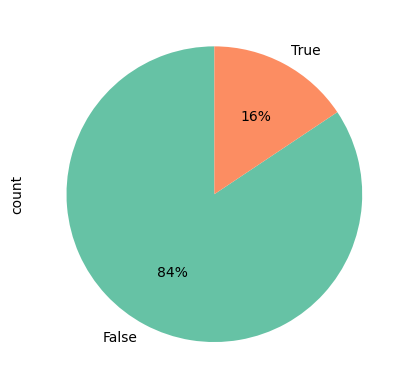

In [111]:
frequency_table_target.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

La gráfica de pastel muestra la distribución porcentual de la variable objetivo "Revenue", que indica si hubo una conversión (compra) o no. Aquí están los insights:

Clase mayoritaria:

La mayor parte de las sesiones están asociadas con la categoría "No" (sin conversión), lo cual es típico en datasets relacionados con comercio electrónico.
Clase minoritaria:

Un porcentaje significativamente menor está asociado con la categoría "Sí" (con conversión), reflejando que las compras ocurren en una proporción mucho menor.
Desbalance de clases:

Este desequilibrio puede ser un desafío en el modelado, ya que los algoritmos de aprendizaje automático pueden favorecer la clase mayoritaria si no se toman medidas adecuadas.

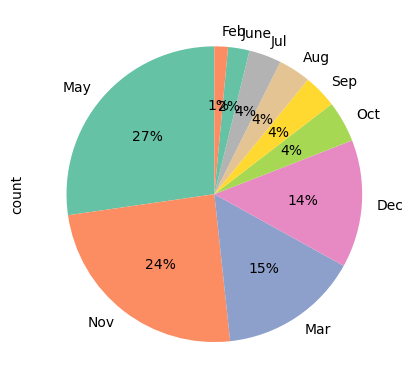

In [113]:
frequency_table_month.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

La gráfica de pastel muestra la distribución porcentual de las sesiones por mes en la variable "Month". Aquí están los insights:

Mes dominante:

Noviembre tiene la mayor proporción de sesiones, lo que sugiere una actividad elevada en este mes, probablemente debido a eventos como el Black Friday y el inicio de las compras navideñas.
Meses con menor actividad:

Algunos meses, como febrero o septiembre, tienen una proporción mucho menor de sesiones, reflejando períodos de baja actividad de los usuarios.
Estacionalidad:

La distribución resalta un claro patrón estacional, donde ciertos meses son consistentemente más activos que otros.

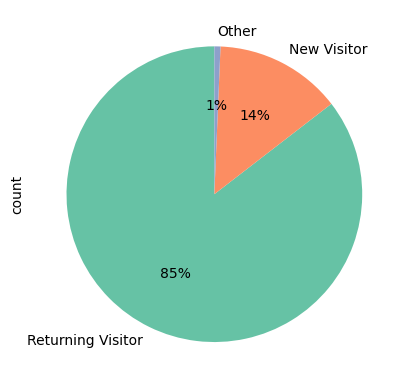

In [114]:
frequency_table_vt.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

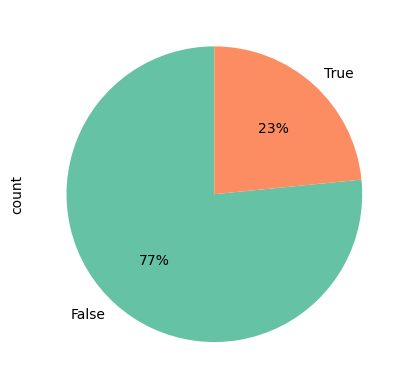

In [115]:
frequency_table_wknd.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

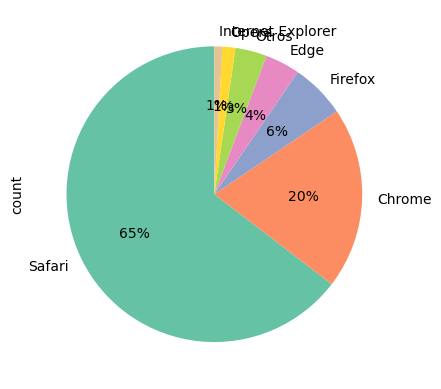

In [116]:
frequency_table_bl.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

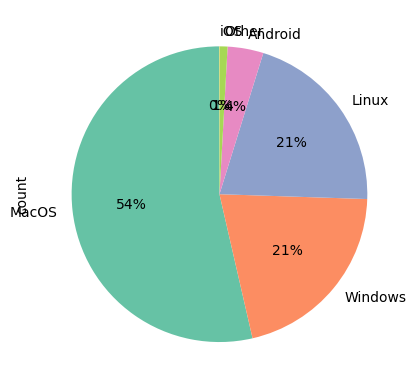

In [135]:
frequency_table_os.plot.pie(autopct='%1.0f%%' ,startangle= 90, colors=sns.color_palette('Set2'))
plt.show()

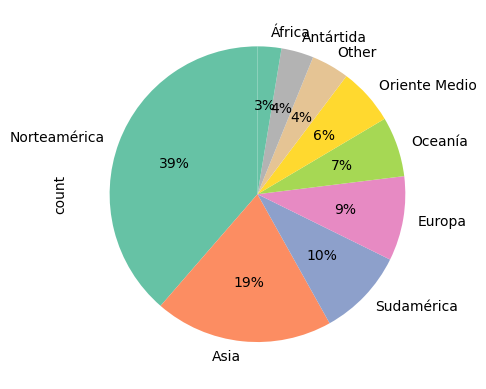

In [126]:
frequency_table_region.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()


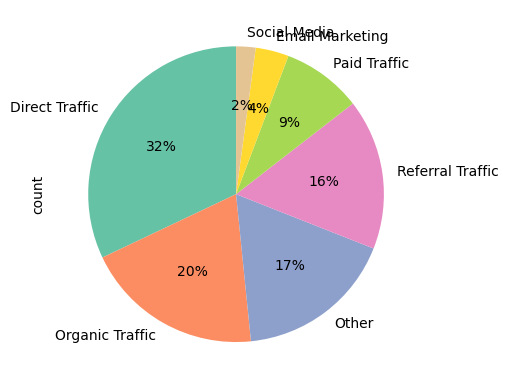

In [130]:
frequency_table_tt.plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()



<h2 style="color: #008080;">Numerical Variables</h2>

In [136]:
num.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.0,3.0,0.0,0.0,1.0,4.0,27.0
Administrative_duration,12205.0,82.0,177.0,0.0,0.0,9.0,95.0,3399.0
Informational,12205.0,1.0,1.0,0.0,0.0,0.0,0.0,24.0
Informational_duration,12205.0,35.0,141.0,0.0,0.0,0.0,0.0,2549.0
Product_related,12205.0,32.0,45.0,0.0,8.0,18.0,38.0,705.0
Product_related_duration,12205.0,1207.0,1920.0,0.0,193.0,609.0,1477.0,63974.0
Bounce_rates,12205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Exit_rates,12205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Page_values,12205.0,6.0,19.0,0.0,0.0,0.0,0.0,362.0
Special_day,12205.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12205 non-null  int64  
 1   Administrative_duration   12205 non-null  float64
 2   Informational             12205 non-null  int64  
 3   Informational_duration    12205 non-null  float64
 4   Product_related           12205 non-null  int64  
 5   Product_related_duration  12205 non-null  float64
 6   Bounce_rates              12205 non-null  float64
 7   Exit_rates                12205 non-null  float64
 8   Page_values               12205 non-null  float64
 9   Special_day               12205 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 953.6 KB


**Measures of Centrality**

In [138]:
def calculate_centrality_dispersion(df):
    """
    Calcula las medidas de centralidad y dispersión para todas las columnas numéricas de un DataFrame.
    """
    stats = {}
    
   
    for col in df.select_dtypes(include=[np.number]).columns:
        col_data = df[col]
        
        
        mean = col_data.mean()
        median = col_data.median()
        mode = col_data.mode().iloc[0] if not col_data.mode().empty else None
        
        
        var = col_data.var()
        std = col_data.std()
        min_val = col_data.min()
        max_val = col_data.max()
        range_val = max_val - min_val
        q1 = col_data.quantile(0.25)
        q3 = col_data.quantile(0.75)
        iqr = q3 - q1  # Rango intercuartílico

        
        stats[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Variance': var,
            'Standard Deviation': std,
            'Min': min_val,
            'Max': max_val,
            'Range': range_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr
        }
    
    
    stats_df = pd.DataFrame(stats).T
    return stats_df

In [139]:
centrality_dispersion_stats = calculate_centrality_dispersion(num)
centrality_dispersion_stats

,Mean,Median,Mode,Variance,Standard Deviation,Min,Max,Range,Q1,Q3,IQR
Administrative,2.338878,1.000000,0.0,1.109181e+01,3.330436,0.0,27.000000,27.000000,0.000000,4.000000,4.000000
Administrative_duration,81.646331,9.000000,0.0,3.150336e+04,177.491845,0.0,3398.750000,3398.750000,0.000000,94.700000,94.700000
Informational,0.508726,0.000000,0.0,1.627198e+00,1.275617,0.0,24.000000,24.000000,0.000000,0.000000,0.000000
Informational_duration,34.825454,0.000000,0.0,2.000098e+04,141.424807,0.0,2549.375000,2549.375000,0.000000,0.000000,0.000000
Product_related,32.045637,18.000000,1.0,1.988594e+03,44.593649,0.0,705.000000,705.000000,8.000000,38.000000,30.000000
Product_related_duration,1206.982457,608.942857,0.0,3.684870e+06,1919.601400,0.0,63973.522230,63973.522230,193.000000,1477.154762,1284.154762
Bounce_rates,0.020370,0.002899,0.0,2.048055e-03,0.045255,0.0,0.200000,0.200000,0.000000,0.016667,0.016667
Exit_rates,0.041466,0.025000,0.2,2.130995e-03,0.046163,0.0,0.200000,0.200000,0.014231,0.048529,0.034298
Page_values,5.949574,0.000000,0.0,3.479594e+02,18.653671,0.0,361.763742,361.763742,0.000000,0.000000,0.000000
Special_day,0.061942,0.000000,0.0,3.986660e-02,0.199666,0.0,1.000000,1.000000,0.000000,0.000000,0.000000


In [140]:
def calculate_kurtosis_skew(df):
   
    stats = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        col_data = df[col].dropna()  # Evitar valores nulos
        
        kurt = kurtosis(col_data)
        skewness = skew(col_data)
        
        stats[col] = {
            'Kurtosis': kurt,
            'Skewness': skewness
        }
    
    stats_df = pd.DataFrame(stats).T
    return stats_df

In [141]:
calculate_kurtosis_skew(num)

,Kurtosis,Skewness
Administrative,4.638964,1.946884
Administrative_duration,50.115759,5.591464
Informational,26.647862,4.013679
Informational_duration,75.502803,7.539364
Product_related,31.059492,4.332887
Product_related_duration,136.624972,7.252270
Bounce_rates,9.329673,3.162036
Exit_rates,4.639677,2.234370
Page_values,64.970911,6.350202
Special_day,9.793141,3.285498


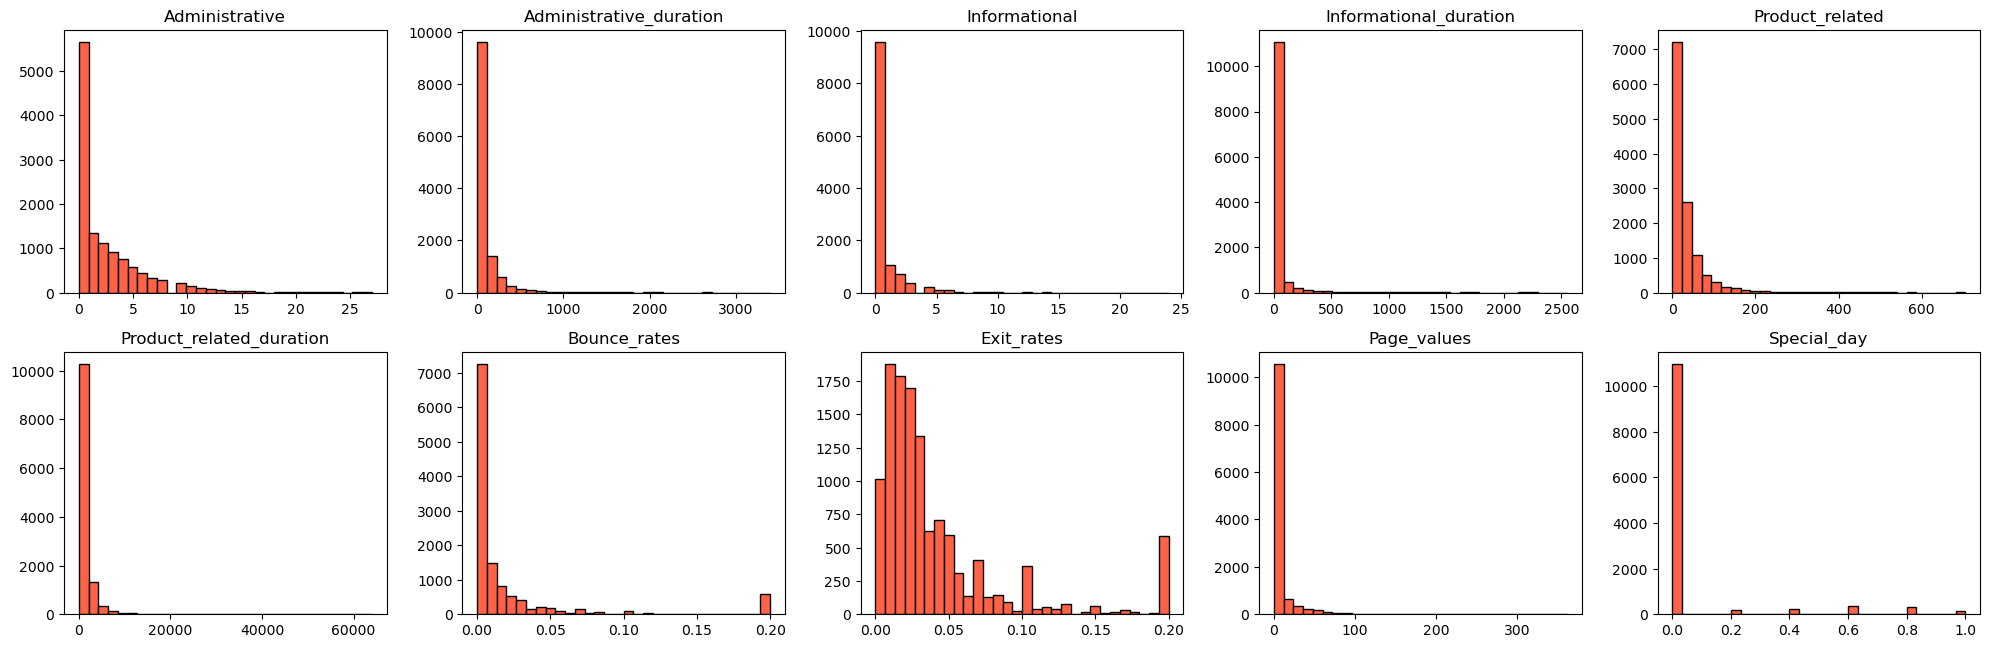

In [142]:
color = '#FF6347'

# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

a gráfica muestra distribuciones de cada variable numérica en el dataset. A continuación, algunos insights generales de las variables:

Simetría y asimetría:

Algunas variables muestran distribuciones simétricas (como una campana), mientras que otras tienen una fuerte asimetría (colas largas a la derecha o izquierda), indicando la presencia de valores extremos o distribuciones sesgadas.
Variables dispersas:

Algunas distribuciones tienen una mayoría de valores cercanos a cero, mientras que otras están más dispersas, sugiriendo diferentes escalas o patrones de datos.
Presencia de valores atípicos:

En variables con colas largas o concentraciones inusuales de valores, es posible que existan valores atípicos (outliers) que podrían necesitar tratamiento según el análisis posterior.


<h2 style="color: #FF6347;">Checking Outliers</h2>

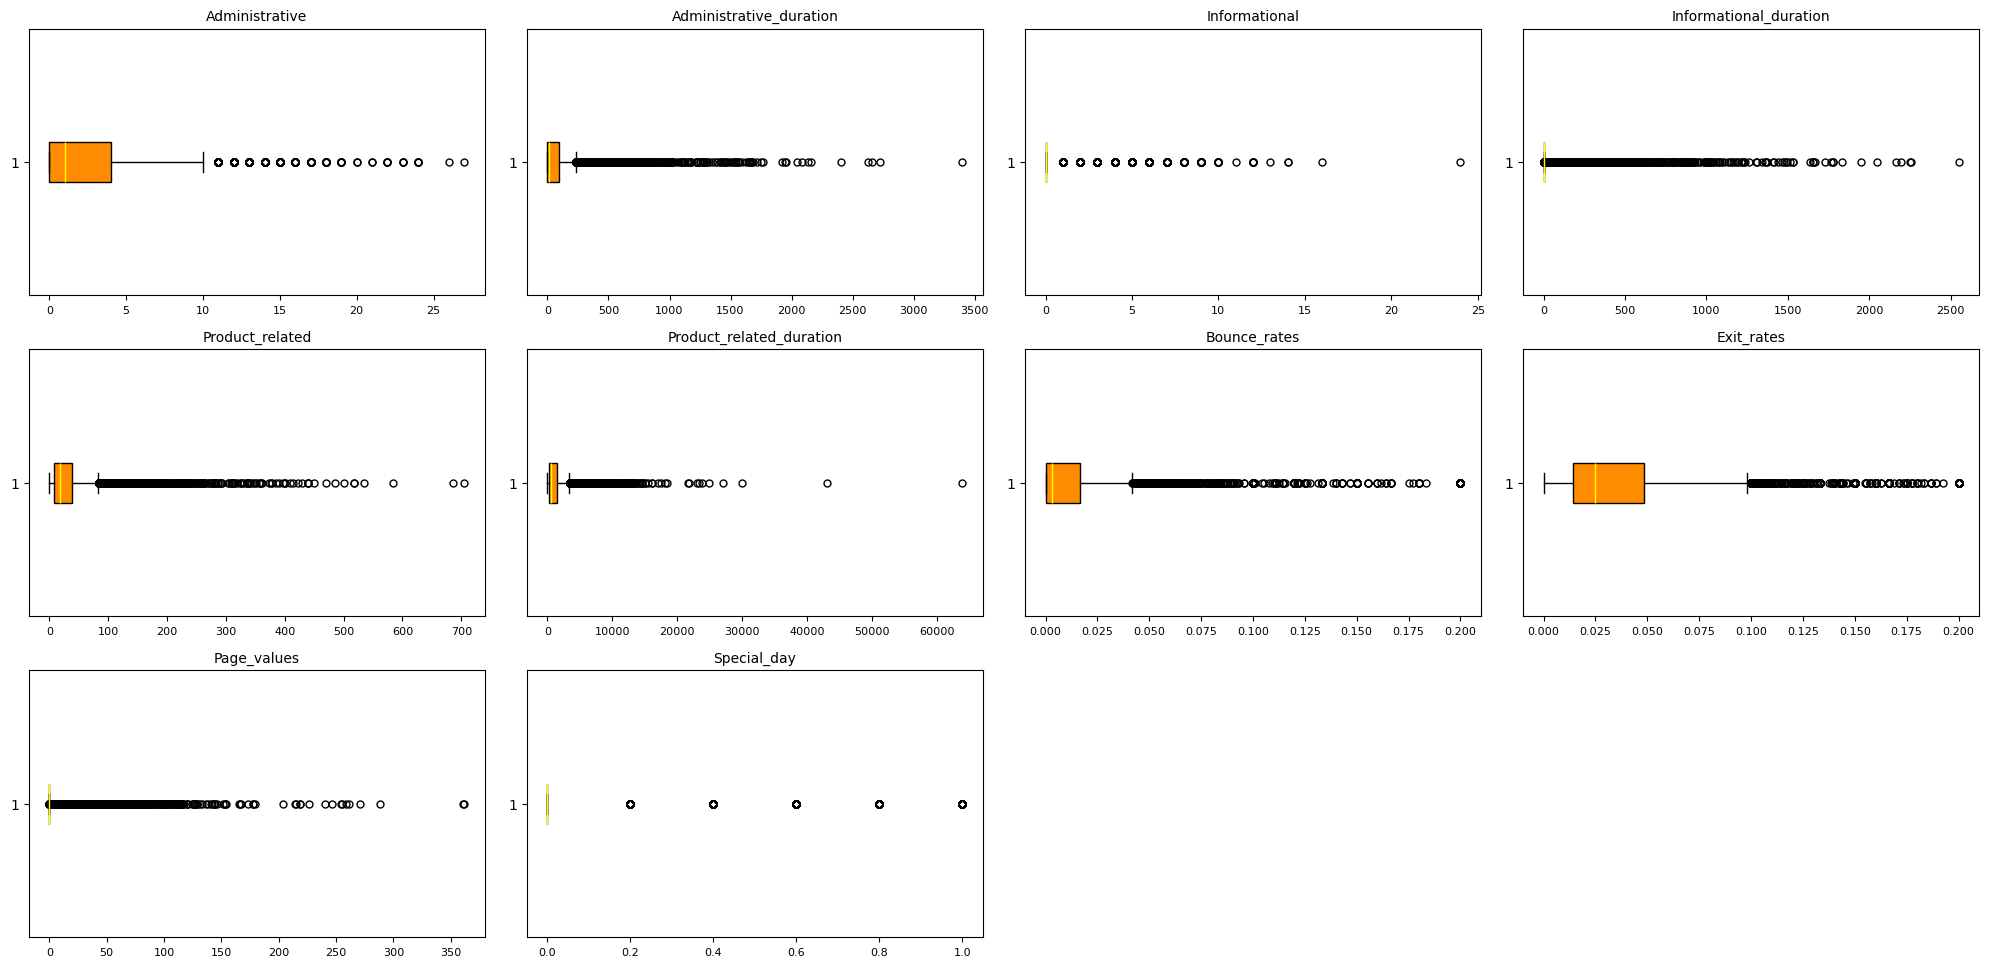

In [146]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

Los diagramas de caja para cada variable numérica muestran la dispersión, mediana y posibles valores atípicos. Aquí están los insights generales:

Rango intercuartílico (IQR):

Las cajas representan la dispersión central de los datos. Una caja más amplia indica mayor variabilidad en los valores centrales.
Mediana:

La línea amarilla dentro de cada caja indica la mediana. Para algunas variables, la mediana está sesgada hacia uno de los lados, lo que puede sugerir distribuciones asimétricas.
Valores atípicos:

Los puntos rojos representan valores fuera del rango esperado, identificados como outliers. Variables como "Product_related_duration" o "Administrative_duration" parecen tener una gran cantidad de valores extremos.
Distribución uniforme vs. concentrada:

Algunas variables tienen una dispersión más uniforme dentro de los bigotes (líneas que extienden la caja), mientras que otras están más concentradas.


### Esto dejalo para cuando estes a punto de hacer el modelado. para que se actualice el df correcto que ahora estas utilizando el df con labels para poder hacer tu analisis unnivariado. 

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5* IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

tukeys_test_outliers(df_univariate.Administrative_duration).sort_values(ascending=False).head(2).index

num.Administrative_duration.loc[7983]

df=df3.drop(index_outlier_sqft_living)

In [167]:
df_univariate.head()

,Administrative,Administrative_duration,Informational,Informational_duration,Product_related,Product_related_duration,Bounce_rates,Exit_rates,Page_values,Special_day,Month,Visitor_type,Weekend,Revenue,Browser_label,Os_label,Region_label,Traffic_type_label
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning Visitor,False,False,Chrome,Windows,Norteamérica,Organic Traffic
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,Returning Visitor,False,False,Safari,MacOS,Norteamérica,Direct Traffic
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,Returning Visitor,False,False,Chrome,Android,Other,Referral Traffic
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,Returning Visitor,False,False,Safari,Linux,Europa,Paid Traffic
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,Returning Visitor,True,False,Internet Explorer,Linux,Norteamérica,Paid Traffic


In [168]:
df_univariate.to_csv('online_shoppers_EDA', index=False)